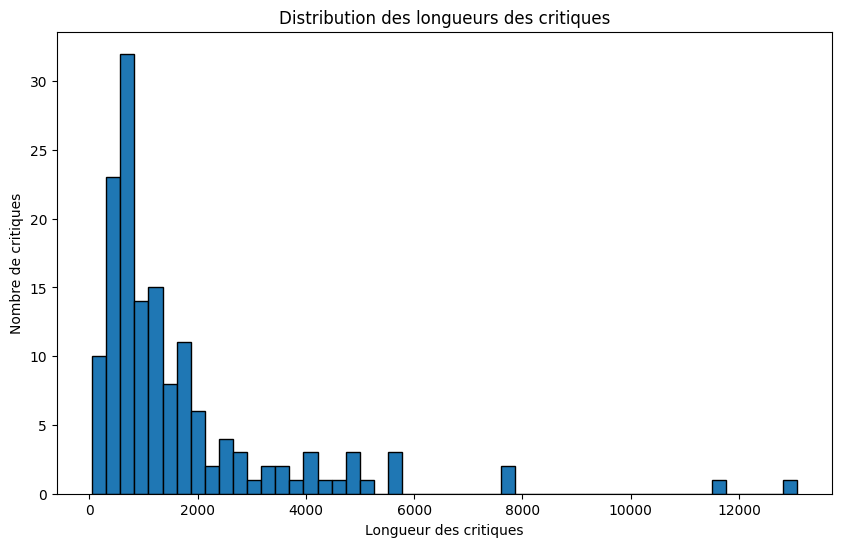

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('book_review_2.0.csv', sep=';')

# 计算每条评论的长度
df['length'] = df['reader_review'].apply(len)

# 绘制评论长度的分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=50, edgecolor='black')
plt.title('Distribution des longueurs des critiques')
plt.xlabel('Longueur des critiques')
plt.ylabel('Nombre de critiques')
plt.show()

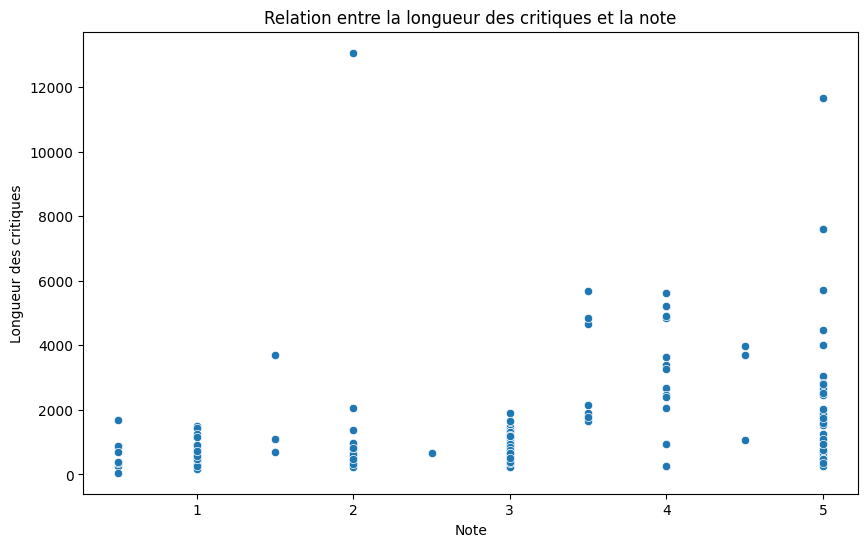

In [6]:
# 绘制评论长度与评分之间的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='length', data=df)
plt.title('Relation entre la longueur des critiques et la note')
plt.xlabel('Note')
plt.ylabel('Longueur des critiques')
plt.show() 

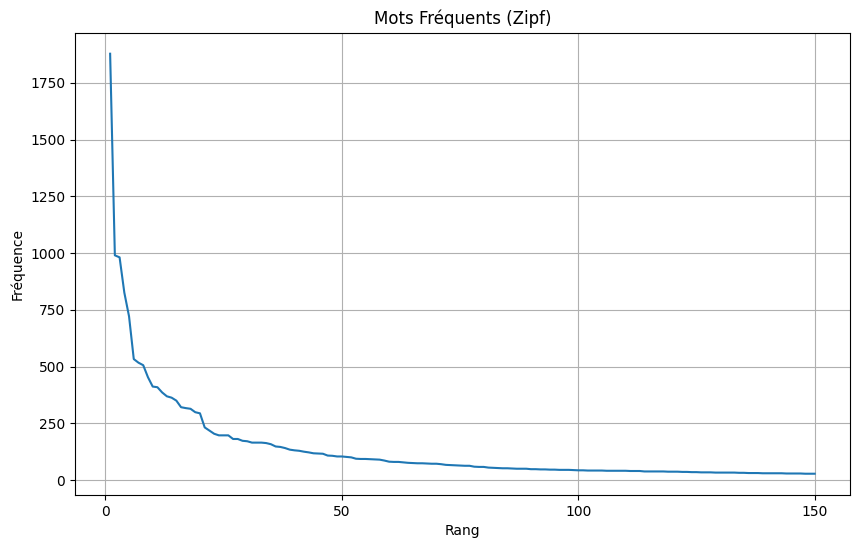

In [7]:
"""
Zipf pour le corpus en tout. 
"""

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('book_review_2.0.csv', sep=';')

# 提取评论内容
reviews_text = df['reader_review']

# 合并所有评论文本
concat_text = ' '.join(reviews_text)

# 分割文本为单词列表
words = concat_text.split()

# 计算词频
word_freq = Counter(words)

# 提取前150个最频繁的单词
top_n = 150
top_words = word_freq.most_common(top_n)

# 绘制Zipf图
plt.figure(figsize=(10, 6))
plt.plot(range(1, top_n + 1), [count for word, count in top_words])
plt.xlabel('Rang')
plt.ylabel('Fréquence')
plt.title('Mots Fréquents (Zipf)')
plt.xticks(range(0, top_n + 1, 50))
plt.grid(True)
plt.show()


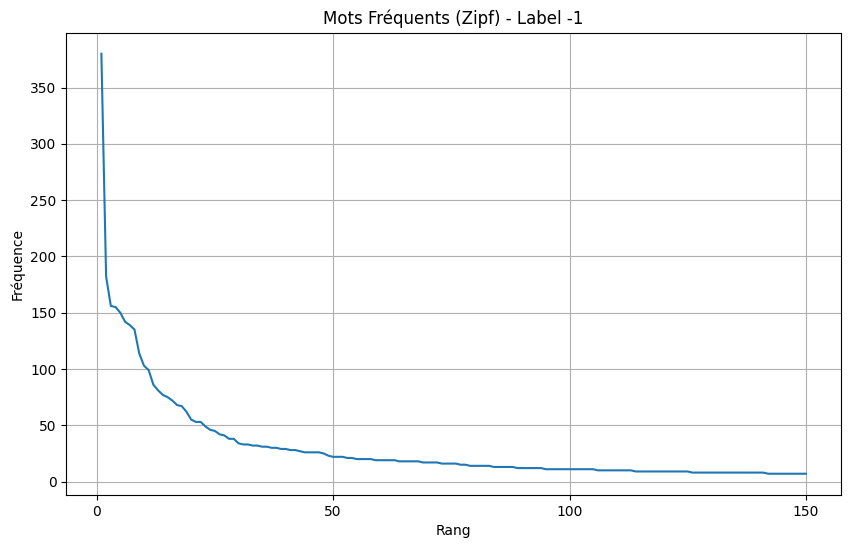

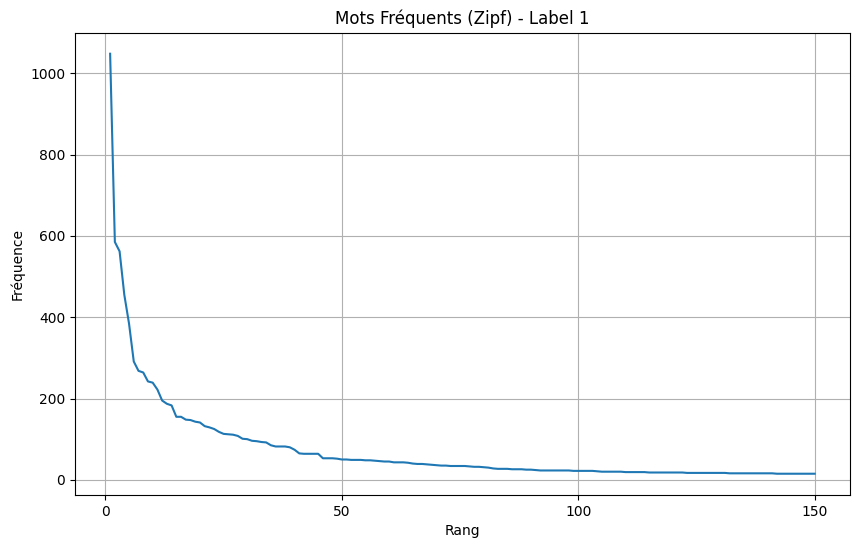

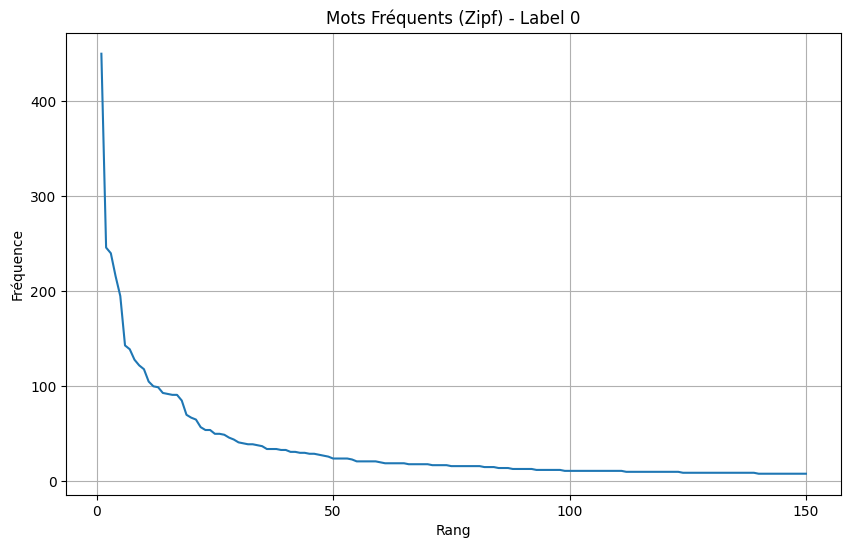

In [1]:
"""
Zipf pour chaque catégorie (positif, neutre et négatif)
"""

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('book_review_2.0.csv', sep=';')

# 根据标签分组并分别处理每个组
labels = df['label'].unique()
top_n = 150

for label in labels:
    # 提取指定标签的评论内容
    reviews_text = df[df['label'] == label]['reader_review']
    
    # 合并所有评论文本
    concat_text = ' '.join(reviews_text)
    
    # 分割文本为单词列表
    words = concat_text.split()
    
    # 计算词频
    word_freq = Counter(words)
    
    # 提取前150个最频繁的单词
    top_words = word_freq.most_common(top_n)
    
    # 绘制Zipf图
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, top_n + 1), [count for word, count in top_words])
    plt.xlabel('Rang')
    plt.ylabel('Fréquence')
    plt.title(f'Mots Fréquents (Zipf) - Label {label}')
    plt.xticks(range(0, top_n + 1, 50))
    plt.grid(True)
    plt.show()

In [19]:
from collections import Counter
import pandas as pd

# Charger le corpus
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Fusionner tous les textes du corpus
concat_text = ' '.join(df['reader_review'])

# Diviser le texte en mots
words = concat_text.split()

# Calculer la fréquence des mots
word_freq = Counter(words)

# Afficher les 10 mots les plus fréquents
print(word_freq.most_common(10))


[('de', 1878), ('et', 990), ('la', 981), ('le', 826), ('à', 721), ('les', 533), ('que', 517), ('un', 506), ('des', 453), ('qui', 412)]


In [20]:
from collections import Counter
import pandas as pd

# Charger le corpus
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Fonction pour obtenir les mots les plus fréquents par étiquette
def get_top_words_by_label(df, label, top_n=10):
    # Filtrer les critiques selon l'étiquette
    label_df = df[df['label'] == label]
    
    # Fusionner tous les textes du corpus pour cette étiquette
    concat_text = ' '.join(label_df['reader_review'])
    
    # Diviser le texte en mots
    words = concat_text.split()
    
    # Calculer la fréquence des mots
    word_freq = Counter(words)
    
    # Obtenir les top N mots les plus fréquents
    top_words = word_freq.most_common(top_n)
    
    return top_words

# Obtenir les mots les plus fréquents pour chaque étiquette
top_words_positive = get_top_words_by_label(df, 1)
top_words_neutral = get_top_words_by_label(df, 0)
top_words_negative = get_top_words_by_label(df, -1)

# Afficher les résultats
print("Top 10 mots les plus fréquents (positif) :", top_words_positive)
print("Top 10 mots les plus fréquents (neutre) :", top_words_neutral)
print("Top 10 mots les plus fréquents (négatif) :", top_words_negative)


Top 10 mots les plus fréquents (positif) : [('de', 1048), ('la', 585), ('et', 562), ('le', 455), ('à', 384), ('les', 291), ('des', 268), ('un', 264), ('en', 242), ('que', 239)]
Top 10 mots les plus fréquents (neutre) : [('de', 450), ('et', 246), ('la', 240), ('le', 216), ('à', 195), ('les', 143), ('un', 139), ('que', 128), ('qui', 122), ('des', 118)]
Top 10 mots les plus fréquents (négatif) : [('de', 380), ('et', 182), ('la', 156), ('le', 155), ('que', 150), ('à', 142), ('pas', 139), ('je', 135), ('ce', 114), ('un', 103)]


In [13]:
import nltk
from statistics import mean

nltk.download('punkt')

# Tokenizer les phrases
sentences = nltk.sent_tokenize(concat_text)

# Calculer la longueur des phrases
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]

# Calculer la longueur moyenne des phrases
average_sentence_length = mean(sentence_lengths)

print("Longueur moyenne des phrases:", average_sentence_length)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pengyuanlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Longueur moyenne des phrases: 22.654959658281918


In [21]:
import nltk
from statistics import mean
import pandas as pd

nltk.download('punkt')

# Charger le corpus
df = pd.read_csv('book_review_2.0.csv', sep=';')

# Fonction pour calculer la longueur moyenne des phrases
def average_sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
    return mean(sentence_lengths) if sentences else 0

# Créer des listes pour stocker les longueurs moyennes des phrases par catégorie
positif_lengths = []
neutre_lengths = []
negatif_lengths = []

# Parcourir les commentaires et calculer les longueurs moyennes des phrases par catégorie
for index, row in df.iterrows():
    label = row['label']
    review = row['reader_review']
    avg_length = average_sentence_length(review)
    
    if label == 1:
        positif_lengths.append(avg_length)
    elif label == 0:
        neutre_lengths.append(avg_length)
    elif label == -1:
        negatif_lengths.append(avg_length)

# Calculer les longueurs moyennes pour chaque catégorie
average_length_positif = mean(positif_lengths) if positif_lengths else 0
average_length_neutre = mean(neutre_lengths) if neutre_lengths else 0
average_length_negatif = mean(negatif_lengths) if negatif_lengths else 0

# Afficher les résultats
print("Longueur moyenne des phrases (positif):", average_length_positif)
print("Longueur moyenne des phrases (neutre):", average_length_neutre)
print("Longueur moyenne des phrases (negatif):", average_length_negatif)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pengyuanlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Longueur moyenne des phrases (positif): 23.145449454600627
Longueur moyenne des phrases (neutre): 26.400125391629242
Longueur moyenne des phrases (negatif): 21.954991960653725


In [23]:
pip install memory-profiler

Note: you may need to restart the kernel to use updated packages.


In [ ]:
'''
Explications pour les codes suivants : 
Selon les consignes, il faut obtenir les résultats concernant le temps d'exécution et l'utilisation de mémoire
D'après le résultat, on pourrait trouver que le temps d'exécution est de 0.29482507705688477 secondes et l'utilisation de la mémoire est de 6.296875 MiB, ce qui implique que le calcul n'est pas assez couteau, donc on met en place une méthode réutilisable" 
''' 

In [3]:
import time
import nltk
from collections import Counter
import pandas as pd
from statistics import mean
from memory_profiler import memory_usage

nltk.download('punkt')

def calculate_statistics(text):
    words = text.split()
    word_freq = Counter(words)
    sentences = nltk.sent_tokenize(text)
    sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
    average_sentence_length = mean(sentence_lengths)
    return {
        'word_freq': word_freq,
        'average_sentence_length': average_sentence_length
    }

# Charger le corpus
df = pd.read_csv('book_review_2.0.csv', sep=';')
concat_text = ' '.join(df['reader_review'])

# Mesurer le temps d'exécution
start_time = time.time()
stats = calculate_statistics(concat_text)
end_time = time.time()
execution_time = end_time - start_time

# Mesurer l'utilisation de la mémoire
mem_usage = memory_usage((calculate_statistics, (concat_text,)))

print(f"Temps d'exécution: {execution_time} secondes")
print(f"Utilisation de la mémoire: {max(mem_usage) - min(mem_usage)} MiB")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pengyuanlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Temps d'exécution: 0.29482507705688477 secondes
Utilisation de la mémoire: 6.296875 MiB


In [4]:
import nltk
from collections import Counter
from statistics import mean
import pandas as pd
import json
import time
from memory_profiler import memory_usage

nltk.download('punkt')

def calculate_statistics(text):
    """
    Calcule les statistiques de base pour un texte donné.
    
    Parameters:
    text (str): Le texte à analyser.
    
    Returns:
    dict: Un dictionnaire contenant les fréquences des mots et la longueur moyenne des phrases.
    """
    words = text.split()
    word_freq = Counter(words)
    sentences = nltk.sent_tokenize(text)
    sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in sentences]
    average_sentence_length = mean(sentence_lengths)
    return {
        'word_freq': word_freq,
        'average_sentence_length': average_sentence_length
    }

# Charger le corpus
df = pd.read_csv('book_review_2.0.csv', sep=';')
concat_text = ' '.join(df['reader_review'])

# Calculer les statistiques
stats = calculate_statistics(concat_text)

# Stocker les résultats dans un fichier JSON
with open('text_statistics.json', 'w', encoding='utf-8') as f:
    json.dump(stats, f, ensure_ascii=False, indent=4)

print("Statistiques calculées et stockées dans 'text_statistics.json'.")

# Fonction réutilisable pour appliquer les calculs sur de nouvelles données
def apply_statistics_to_new_data(new_text):
    return calculate_statistics(new_text)

# Exemple d'utilisation avec un nouveau texte
new_text = "Ceci est un nouveau texte pour démontrer l'utilisation de la fonction réutilisable."
new_stats = apply_statistics_to_new_data(new_text)
print("Statistiques pour le nouveau texte:", new_stats)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pengyuanlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Statistiques calculées et stockées dans 'text_statistics.json'.
Statistiques pour le nouveau texte: {'word_freq': Counter({'Ceci': 1, 'est': 1, 'un': 1, 'nouveau': 1, 'texte': 1, 'pour': 1, 'démontrer': 1, "l'utilisation": 1, 'de': 1, 'la': 1, 'fonction': 1, 'réutilisable.': 1}), 'average_sentence_length': 13}
